In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from IPython.core.pylabtools import figsize
import scipy.stats as stats
%matplotlib inline
figsize(12.5,4)


#1D

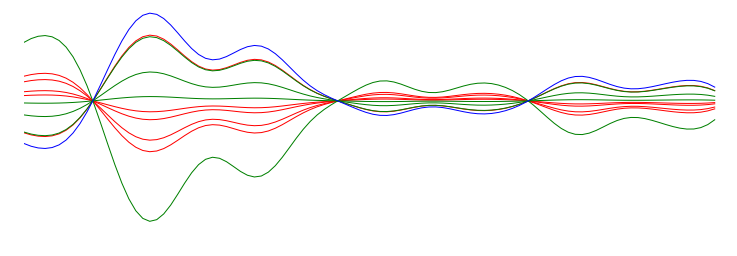

In [33]:
#np.random.seed(42)

value='c'
x = np.array([10])#,10,9])
y= np.array([1])#,2,10])
c=1
kernel = {
    'linear': lambda x,y: c*x *y,
    'brownian': lambda x,y: c*np.min((x,y),axis=0),
    'c': lambda x,y: np.exp(-100*(x-y)*(x-y)),
    'd': lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))),
    'e': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2),
    'e2': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y)**2)),
    'f': lambda x,y: np.exp(-100*min(abs(x-y),abs(x+y)))
}[value]
if value=='f':
    start = -1
else:
    start = 0
x = np.linspace(start,1,100)
n = len(x)
C = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        C[i,j] = kernel(x[i],x[j])

num_ = 100
dist = stats.norm
u = dist.rvs(0,1,(num_,1))[::10]

a, s, b = np.linalg.svd(C, full_matrices=True)
for i in range(len(u)):
    if i in range(5):
        color = 'r'
    if i in range(5,9):
        color = 'g'
    if i in range(9,10):
        color = 'b'
    tmp = a.dot(np.sqrt(s))*u[i].T
    plt.plot(tmp.T,color = color);
plt.axis('off')

plt.savefig('whatever_christmas3.png', facecolor='white', edgecolor='k')


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


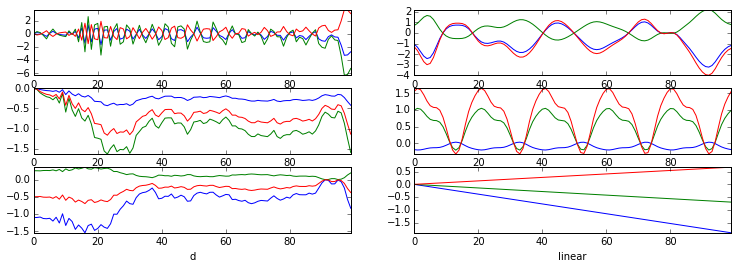

In [20]:
np.random.seed(42)

value='c'
x = np.array([10,10,9])
y= np.array([1,2,10])
c=1

kernels = {
    'linear': lambda x,y: c*x *y,
    'brownian': lambda x,y: c*np.min((x,y),axis=0),
    'c': lambda x,y: np.exp(-100*(x-y)*(x-y)),
    'd': lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))),
    'periodic': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2),
    'semi-periodic': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y)**2)),
    'f': lambda x,y: np.exp(-100*min(abs(x-y),abs(x+y)))
}

x = np.linspace(start,1,100)
n = len(x)
C = np.zeros((n,n))

list_ = [x for x in kernels.keys()]


for k,value in enumerate(list_):
    sx = plt.subplot(len(list_)/2,2,k)
    plt.xlabel(value) 
    
    
    kernel = kernels[value]
    if value=='f':
        start = -1
    else:
        start = 0

    for i in range(n):
        for j in range(n):
            C[i,j] = kernel(x[i],x[j])

    num_ = 300
    dist = stats.norm
    u = dist.rvs(0,1,(num_,1))[::100]

    a, s, b = np.linalg.svd(C, full_matrices=True)
    for i in range(len(u)):
        tmp = a.dot(np.sqrt(s))*u[i].T
        plt.plot(tmp.T,label= u[i][0:2]);

        #leg = plt.legend()
        #leg.get_frame().set_alpha(0.4)
        plt.autoscale(tight=True)

##sampling

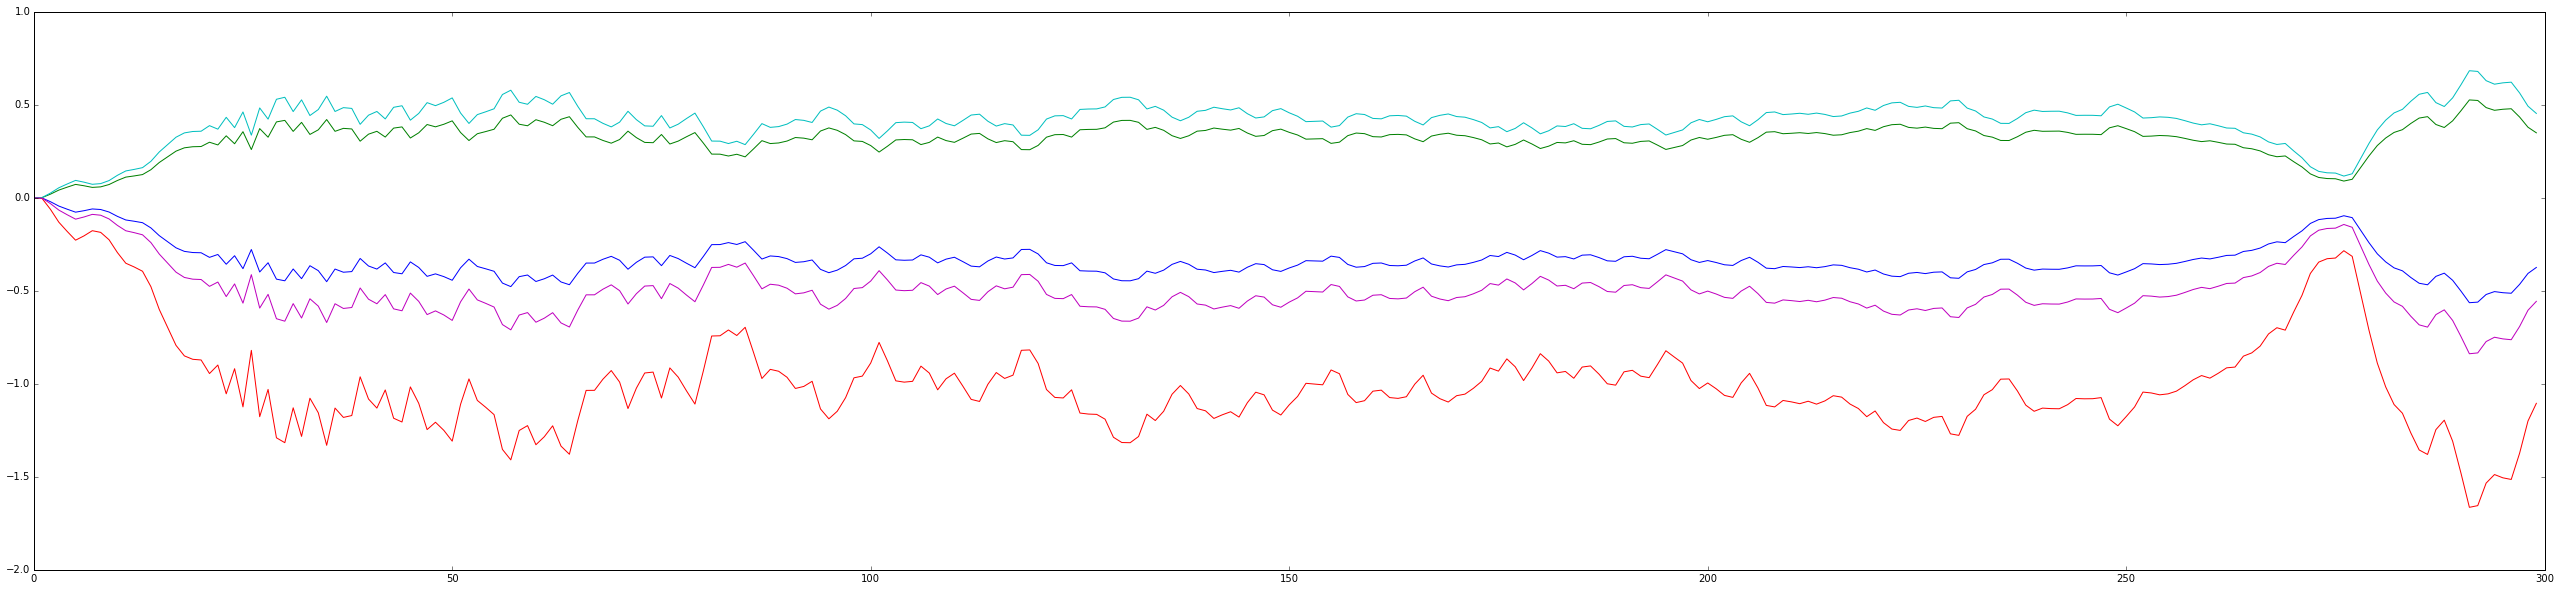

In [164]:
np.random.seed(42)

       

value='brownian'
x = np.array([10,10,9])
y= np.array([1,2,10])
c=1
kernel = {
    'linear': lambda x,y: c*x *y,
    'brownian': lambda x,y: c*np.min((x,y),axis=0),
    'c': lambda x,y: np.exp(-100*(x-y)*(x-y)),
    'd': lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))),
    'e': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2),
    'e2': lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y)**2)),
    'f': lambda x,y: np.exp(-100*min(abs(x-y),abs(x+y)))
}[value]
if value=='f':
    start = -1
else:
    start = 0
x = np.linspace(start,1,300)
n = len(x)
C = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        C[i,j] = kernel(x[i],x[j])
        
        

num_ = 50
dist = stats.norm
u = dist.rvs(0,1,(num_,1))[::10]
plt.figure(figsize=(45,10))

a, s, b = np.linalg.svd(C, full_matrices=True)
for i in range(len(u)):
    tmp = a.dot(np.sqrt(s))*u[i].T
    plt.plot(tmp.T);
    
    
    
    
    
    
    
    
    
    
    


C:\Users\Trost\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:35: RuntimeWarning: invalid value encountered in sqrt


(-2, 1)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


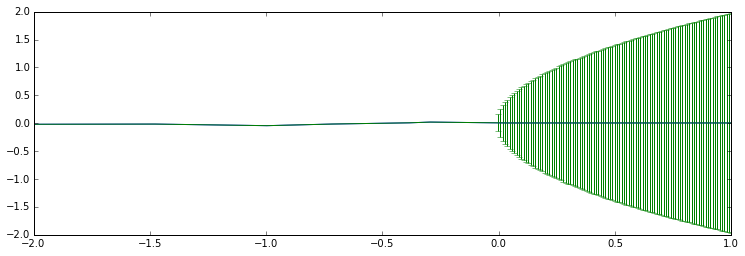

In [165]:
x = np.linspace(-2,1,300)
n = len(x)
value='b'
sigma_n = 0.1
errorf = lambda x,y: sigma_n**2*(x==y)#.all() #for vetors

x_o = [-1.5,-1.,-.75,-.4,-.3,.0]
y_o = [-1.6,-1.3,-.5,.0,.3,.6]
m = len(x_o)
k = np.zeros((len(x_o),len(x_o))) 
for i in range(m):
    for j in range(m):
        k[i,j] = kernel(x_o[i],x_o[j])
        
k_ss = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        k_ss[i,j] = kernel(x[i],x[j]) + errorf(x[i],x[j]) 
        
        

        
        
k_s = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        k_s[i,j]= kernel(x[i],x_o[j])
        
        
k.shape,k_ss.shape,k_s.shape

tmp,_,_,_ = np.linalg.lstsq(k_s.T,k)
mu = tmp.dot(np.atleast_2d(y_o).T)
sigma = 1.96*np.sqrt(np.diag(k_ss-
                             tmp.dot(k_s.T)))
plt.plot(x,mu)
plt.errorbar(x,mu,yerr=sigma)
#plt.scatter(x_o,y_o)

#regress

plt.xlim([-2,1]);

 

#   '  
# k = np.zeros((len(x_o),len(x_o)))
# for i in range(len(x_o)):
#     for j in range(len(x_o)):
#         k[i,j] = kernel(x_o[i],x_o[j]) 
        
        
# x = np.linspace(start,1,100)
# n = len(x)
# k_ss = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         k_ss[i,j] = kernel(x[i],x[j])


# k_s = np.zeros((n,len(x_o)))       
# for i in range(n):
#     for j in range(len(x_o)):
#         k_s[i,j] = kernel(x[i],x_o[j]) 
        
        
# tmp,_,_,_ = np.linalg.lstsq(k_s.T,k)
# mu = tmp.dot(np.atleast_2d(y_o).T)
# sigma = 1.96*(#np.sqrt(
#     np.diag(C-tmp.dot(k_s.T)))
# #Sigma = 1.96*np.sqrt(np.linalg.diag(c-K_s/K.dot(K_s).T);
# plt.plot(mu)'

from http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section5_1-Gaussian-Processes.ipynb

In [166]:
import seaborn as sns; sns.set_context('notebook')
figsize=(45,10)
exponential_kernel = lambda x,y,params: params[0]* np.exp(-.5 *params[1] * np.sum((x-y)**2))

In [167]:
x = np.array([1,2,3])
y = 1-x

In [168]:
covariance = lambda kernel,x,y,params: np.array([[kernel(xi,yi,params) for xi in x] for yi in y])

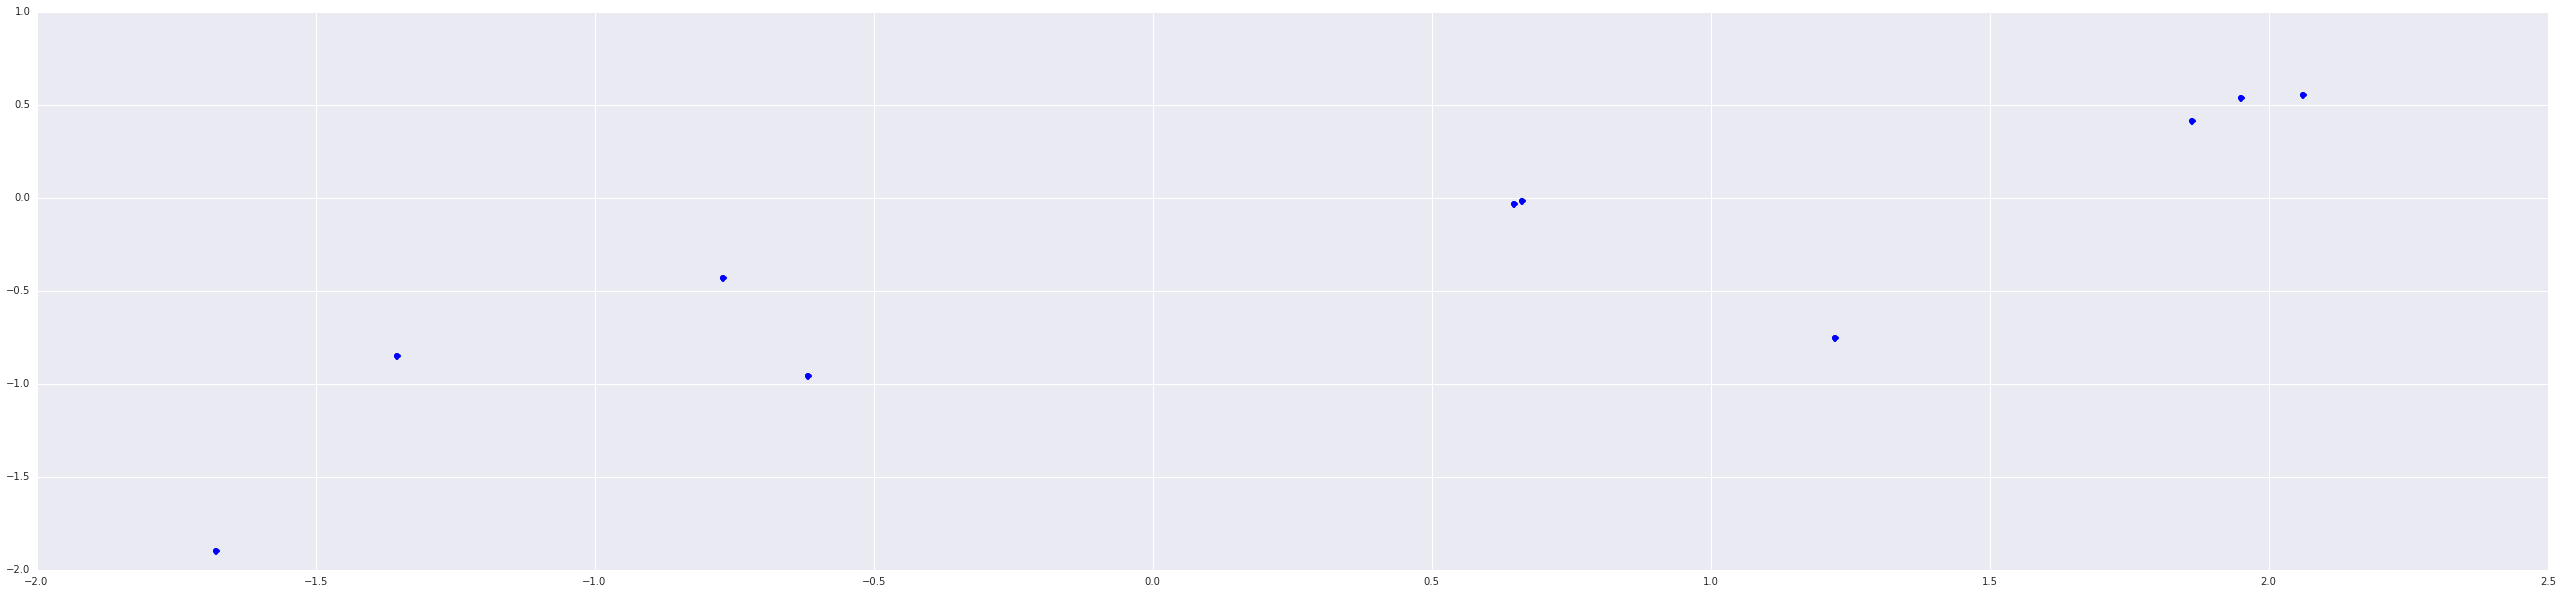

In [169]:
x = np.random.randn(10)*2
theta = [1,10]
sigma = covariance(exponential_kernel,x,x,theta)
y = np.random.multivariate_normal(np.zeros(len(x)),sigma)
plt.figure(figsize=(45,10))

plt.plot(x,y,'bo')

In [170]:
exponential_kernel(x,y,theta)

3.1770010456816512e-26

In [171]:

def conditional(x_new, x, y, fcov=exponential_kernel, params=theta):
    B = covariance(fcov, x_new, x, params)
    C = covariance(fcov, x, x, params)
    A = covariance(fcov, x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B).T.dot(y)
    sigma = A - np.linalg.inv(C).dot(B).T.dot(B)
    return mu.squeeze(), sigma.squeeze()

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


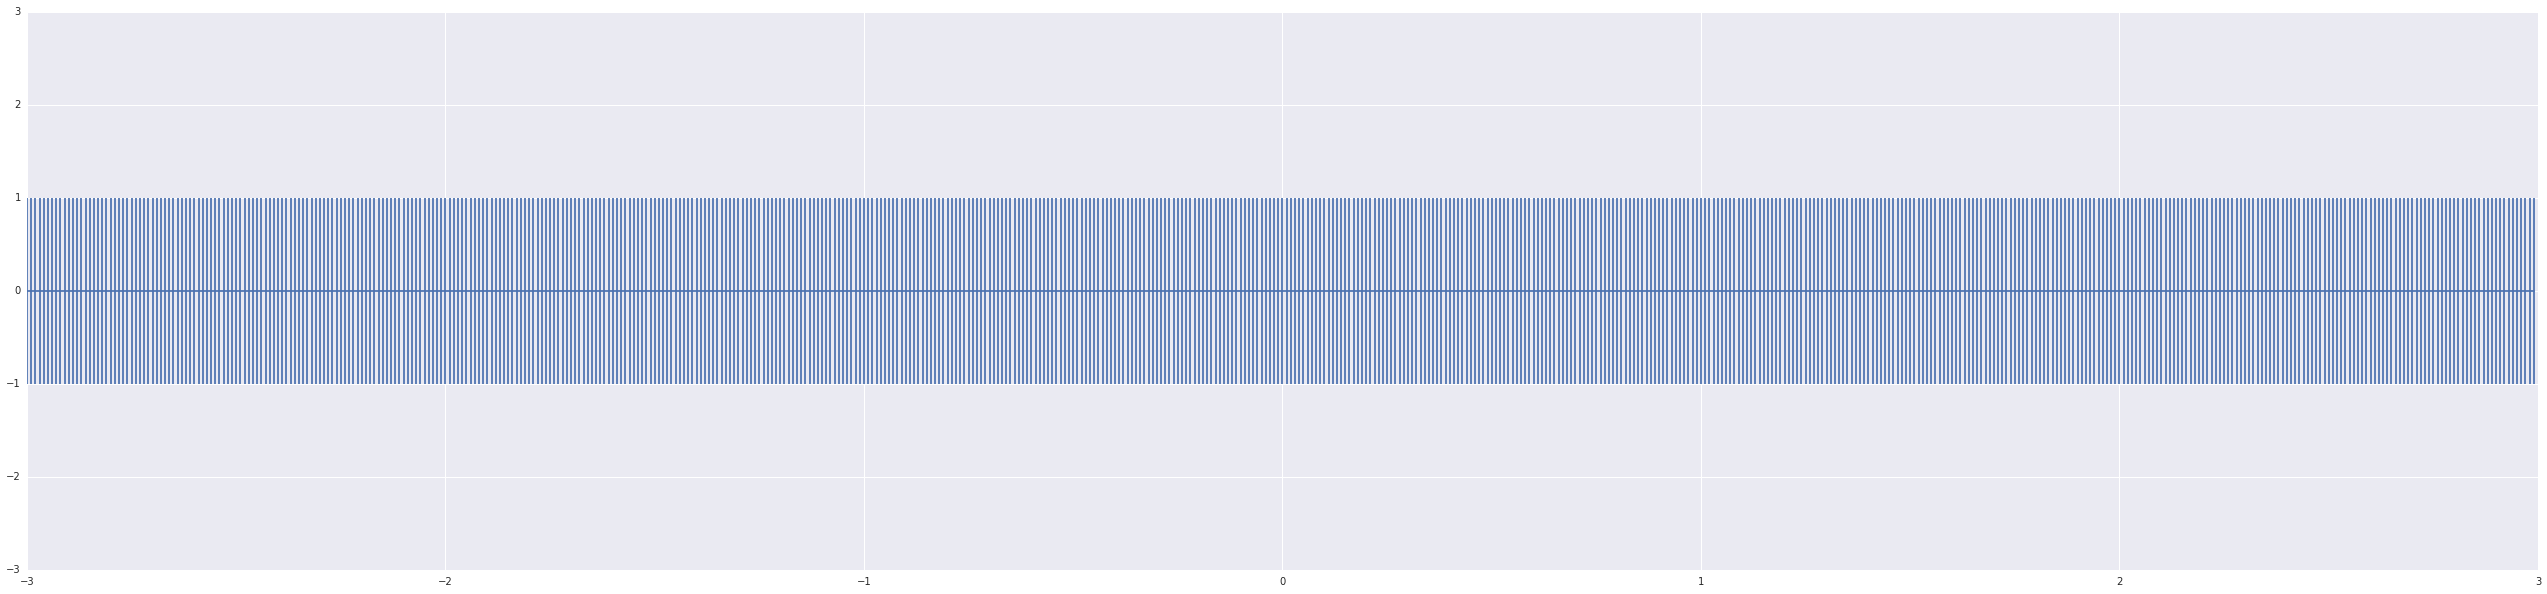

In [172]:
sigma0 = exponential_kernel(0,0,theta)
xpts = np.arange(-3,3,step=.01)

plt.figure(figsize=(45,10))

plt.errorbar(xpts,np.zeros(len(xpts)),yerr=sigma0,capsize=0)

plt.ylim(-3,3);

In [173]:
x = [1.]
y = [np.random.normal(scale=sigma0)]
y

[0.36139560550841393]

In [174]:
sigma1 = covariance(exponential_kernel,x,x,theta)

In [175]:
def predict(x,data,kernel,params,sigma,t):
    k = [kernel(x,y,params)for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k,Sinv).dot(t)
    sigma_new = kernel(x,x,params) - np.dot(k,Sinv).dot(k)
    return y_pred, sigma_new

In [176]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_kernel, theta, sigma1, y) 
               for i in x_pred]

In [177]:
np.array(predictions).shape

(1000, 2)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


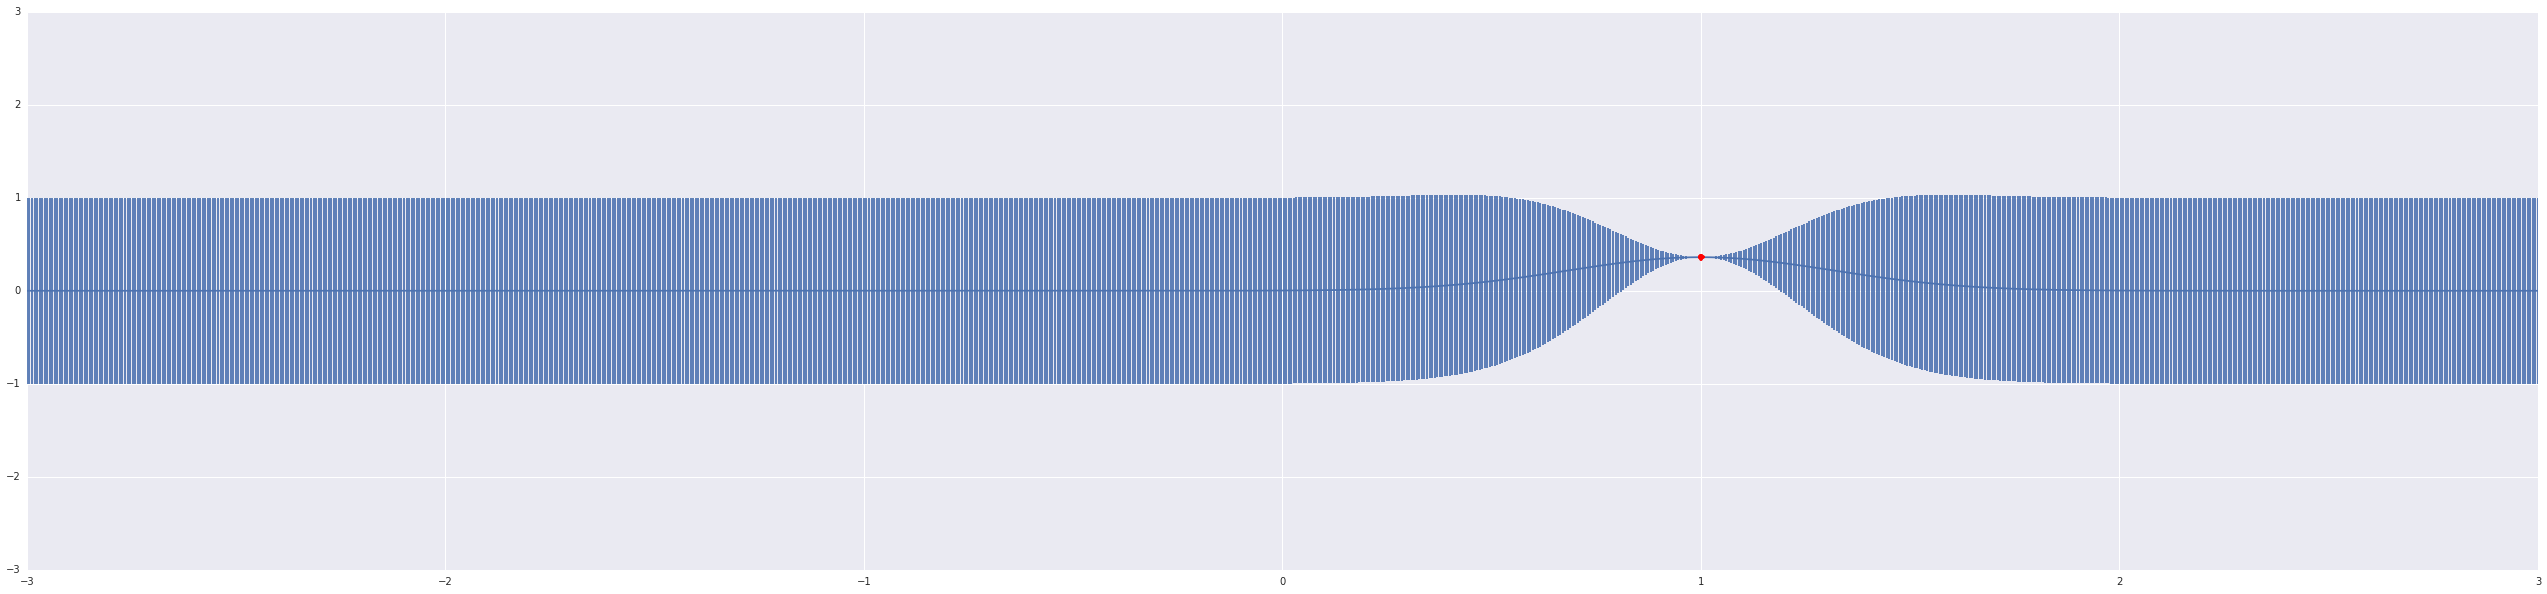

In [178]:
y_pred,sigmas = np.transpose(predictions)
plt.figure(figsize=(45,10))

plt.errorbar(x_pred,y_pred,yerr=sigmas,capsize=0)
plt.plot(x,y,'ro')
plt.xlim(-3,3);
plt.ylim(-3,3);

In [179]:
mu2, s2 = conditional([-0.7], x, y)
y2 = np.random.normal(mu2, s2)
y2

1.5380367580796988

In [180]:
x.append(-0.7)
y.append(y2)

In [181]:
sigma2 = covariance(exponential_kernel, x, x, theta)


In [182]:
predictions = [predict(i, x, exponential_kernel, theta, sigma2, y) 
               for i in x_pred]

(-3, 3)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


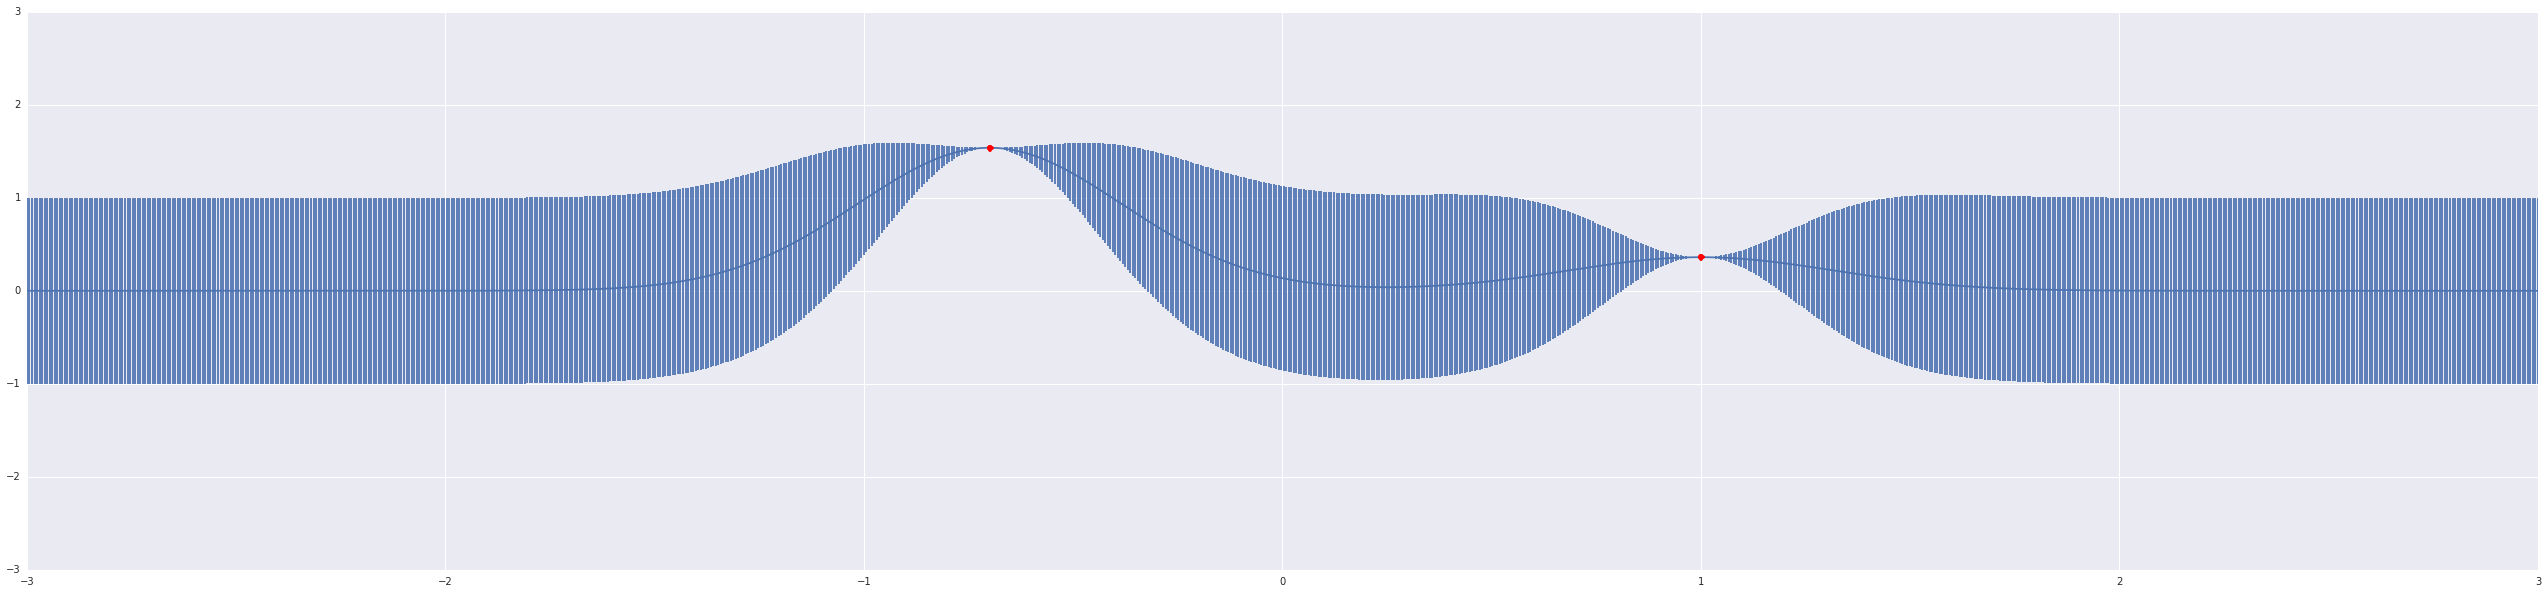

In [183]:

y_pred, sigmas = np.transpose(predictions)
plt.figure(figsize=(45,10))

plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3)

In [184]:
x_more = [-2.1, -1.5, 0.3, 1.5, 2.5]
mu, s = conditional(x_more, x, y)
y_more = np.random.multivariate_normal(mu, s)
y_more
x += x_more
y += y_more.tolist()

In [185]:
x_more = [0,1.8]
mu, s = conditional(x_more, x, y)
y_more = np.random.multivariate_normal(mu, s)
y_more
x += x_more
y += y_more.tolist()


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


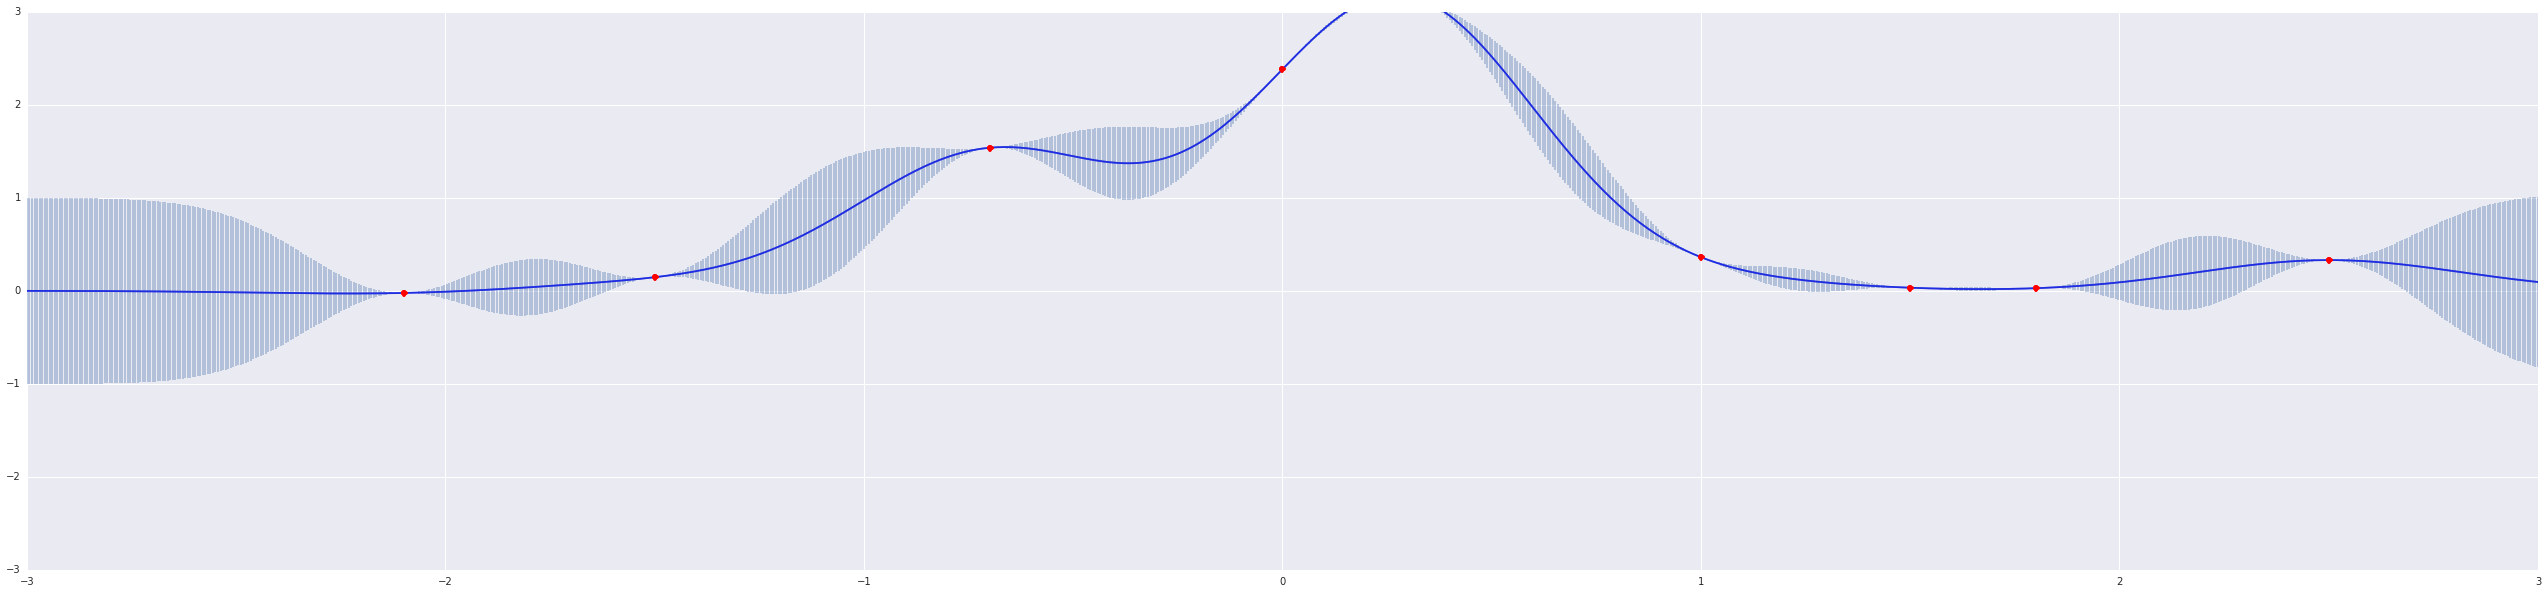

In [186]:

sigma_new = covariance(exponential_kernel, x, x, theta)

predictions = [predict(i, x, exponential_kernel, theta, sigma_new, y) 
               for i in x_pred]

y_pred, sigmas = np.transpose(predictions)

plt.figure(figsize=(45,10))

plt.plot(x_pred, y_pred,color='b')
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0,alpha=.4)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

In [187]:

# Exponential kernel, plus constant and linear terms
exponential_linear_kernel = lambda x, y, params: \
    exponential_kernel(x, y, params[:2]) + params[2] + params[3] * np.dot(x, y)

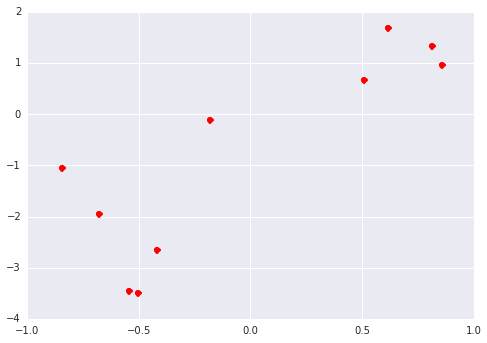

In [188]:
# Parameters for the expanded exponential kernel
theta = 2.0, 50.0, 0.0, 1.0

# Some sample training points.
xvals = np.random.rand(10) * 2 - 1

# Construct the Gram matrix
C = covariance(exponential_linear_kernel, xvals, xvals, theta)

# Sample from the multivariate normal
yvals = np.random.multivariate_normal(np.zeros(len(xvals)), C)

plt.plot(xvals, yvals, "ro")

In [189]:

x_pred = np.linspace(-1, 1, 1000)
predictions = [predict(i, xvals, exponential_linear_kernel, theta, C, yvals) 
               for i in x_pred]

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


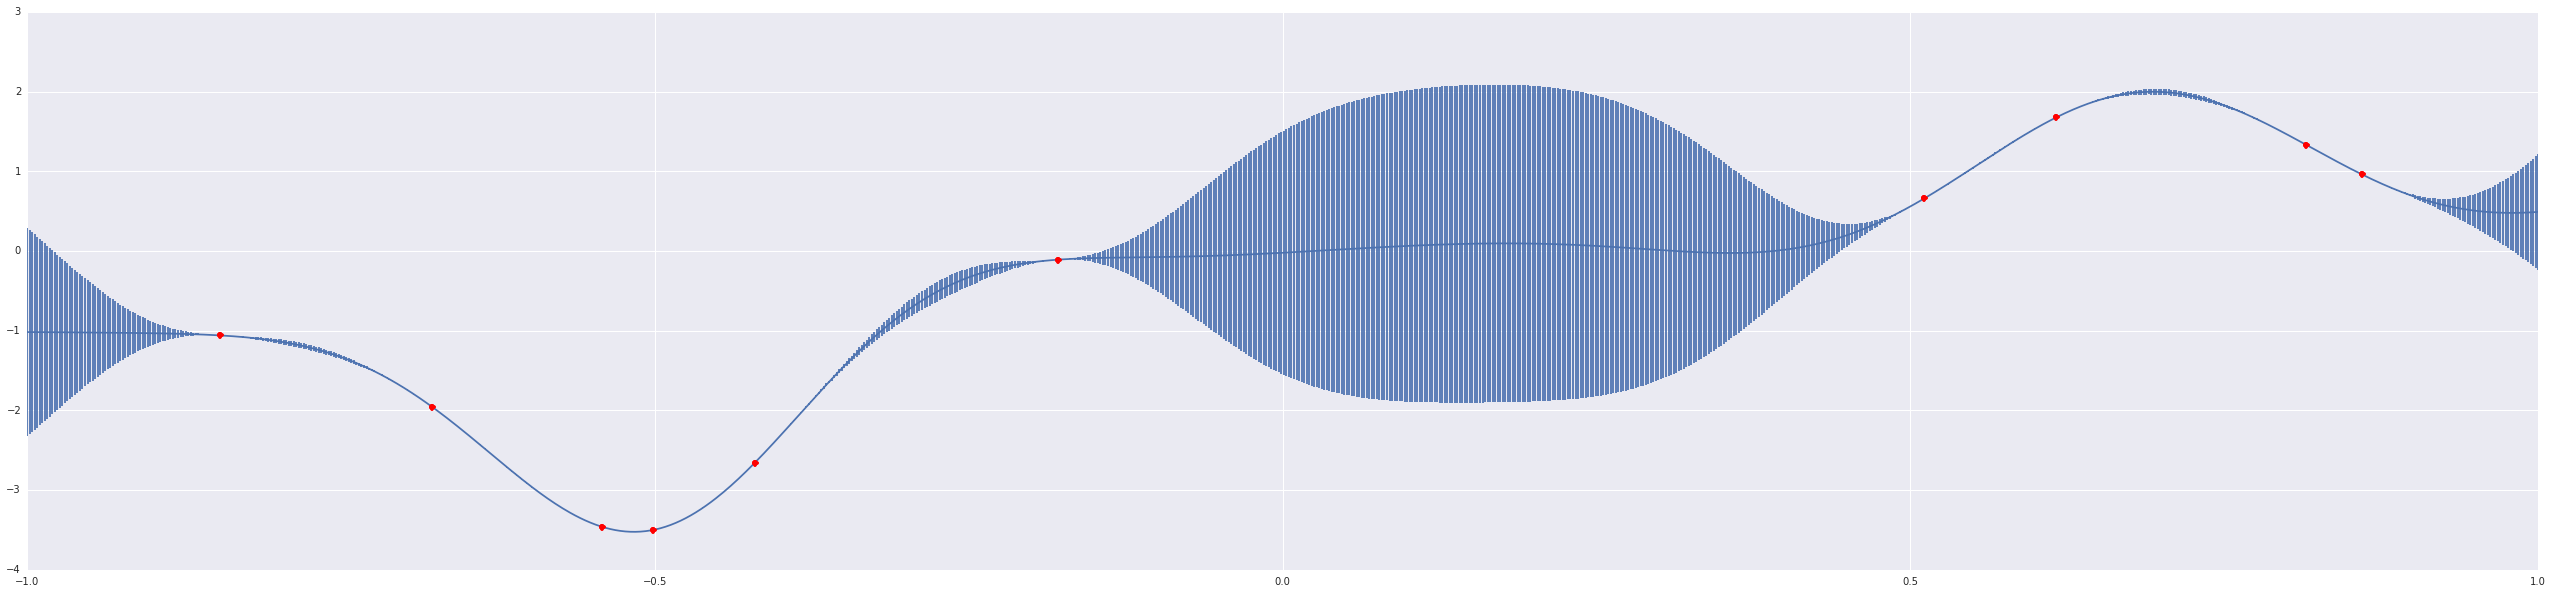

In [190]:
y, sigma = np.transpose(predictions)
plt.figure(figsize=(45,10))

plt.errorbar(x_pred, y, yerr=sigma, capsize=0)
plt.plot(xvals, yvals, "ro")

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


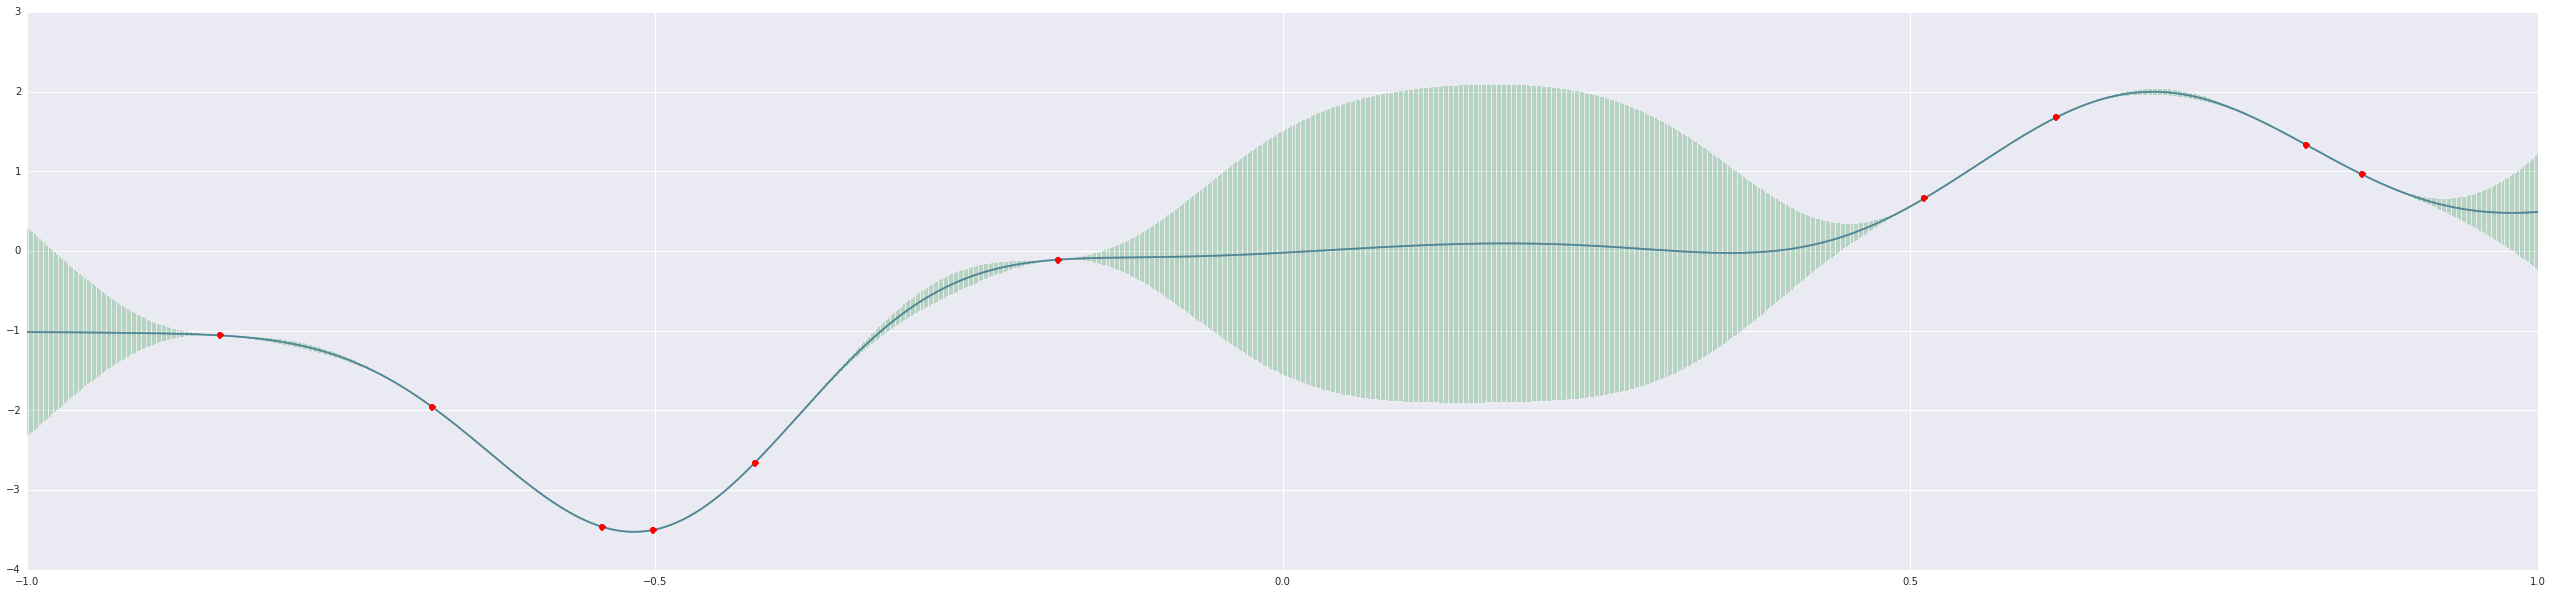

In [191]:

y, sigma = np.transpose(predictions)
plt.figure(figsize=(45,10))
plt.plot(x_pred, y)
plt.errorbar(x_pred, y, yerr=sigma, capsize=0,alpha=.4)
plt.plot(xvals, yvals, "ro")

#2D

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


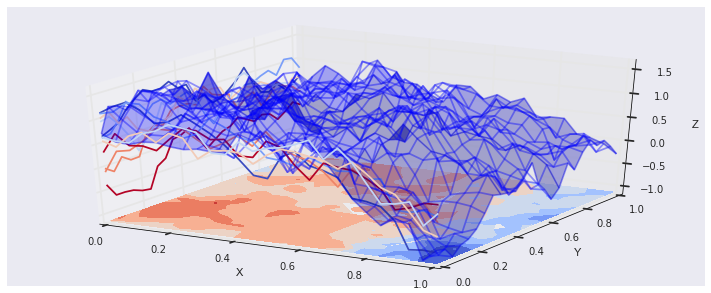

In [201]:
figsize=(22.5,8)

value='c'

c=1
kernel = {
    'a': lambda x,y: c*x.T.dot(y),
    'b': lambda x,y: np.exp(-100*(x-y).T.dot(x-y)),
    'c': lambda x,y: np.exp(-1*np.sqrt((x-y).T.dot(x-y)))
    #'d': lambda x,y: np.min(x,y)
}[value]

sigma_n = .1
errorf = lambda x,y: sigma_n**2*(x==y).all()

n_points=25
points = np.linspace(0,1,n_points).T
[u,v] = np.meshgrid(points,points)
x = np.array([u.flatten(),v.flatten()])#arrays zu 1d machen
n = x.shape[1]

C = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        C[i,j]=kernel(x[:,i],x[:,j]) + errorf(x[:,i],x[:,j])
        
num_ = 1
dist = stats.norm
fac = dist.rvs(0,1,(num_,1))#[::10]

a, s, b = np.linalg.svd(C, full_matrices=True)
tmp = a.dot(np.sqrt(s))*fac.T

z = tmp.reshape((n_points,n_points))

#plotting
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(figsize=(45,10))

fig = plt.figure(figsize=(12.5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               #, cmap=cm.coolwarm
               );
ax.plot_wireframe(u,v,z,alpha=.4)
cset = ax.contourf(u,v,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='x', offset=np.max(x), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='y', offset=np.min(u), cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')





C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


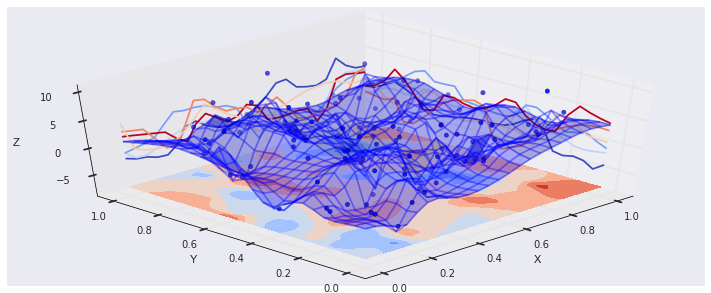

In [198]:
np.random.seed(422)
num_obs = 100

observed = np.array([np.random.uniform(0,1,num_obs),np.random.uniform(0,1,num_obs)])
#observed = np.array([[.5,.0],[.4,.1],[.0,.6],[.01,.4]]).T
#observed_y = np.array([[.31],[.3],[.3],[.3]]) #np.atleast_2d(np.random.normal(0,1,len(observed)))#np.array([[.31],[.3],[.3]])
observed_y = np.atleast_2d(np.array(np.random.normal(1,3,num_obs))).T + np.atleast_2d(np.array(np.random.normal(0,2,num_obs))).T

cbb  = np.zeros((num_obs,num_obs))
cab = np.zeros((n,num_obs))
caa = C
cba = np.zeros((num_obs,n))


for i in range(num_obs):
    for j in range(num_obs):
        cbb[i,j] = kernel(observed[:,i],observed[:,j])
        
for i in range(n):
    for j in range(num_obs):
        #cba[i,j] = kernel(x[:,i],observed[:,j])
        cba[j,i] = kernel(x[:,i],observed[:,j])
        
for i in range(num_obs):
    for j in range(n):
        cab[j,i] = kernel(observed[:,i],x[:,j])
        

    
    
tmp = cab.dot(np.linalg.inv(cbb))
m = tmp.dot(observed_y- np.atleast_2d(np.mean(observed_y,axis=0)))


d = caa - cab.dot(np.linalg.inv(cbb)).dot(cba)

dist = stats.multivariate_normal

fac = dist.rvs(cov=d)#+m.T#,(num_,1))#[::10]
fac = (np.atleast_2d(fac)+m.T).T
a, s, b = np.linalg.svd(C, full_matrices=True)
tmp = a.dot(np.sqrt(s))*fac.T

z1 = tmp.reshape((n_points,n_points))
z = m.reshape((n_points,n_points))
#plotting
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(figsize=(45,10))

fig = plt.figure(figsize=(12.5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               #, cmap=cm.coolwarm
               );

# ax.plot_surface(u,v,z1
#                 ,shade=True,
#                 rstride=8, cstride=8, alpha=0.3
#                #, cmap=cm.coolwarm
#                );
ax.plot_wireframe(u,v,z,alpha=.4)
ax.scatter(observed[0],observed[1],observed_y)



ax.view_init(elev=45,azim=225)


cset = ax.contourf(u,v,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='x', offset=np.max(x), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='y', offset=np.max(u), cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')




In [199]:
d.shape,z.shape

((625, 625), (25, 25))

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


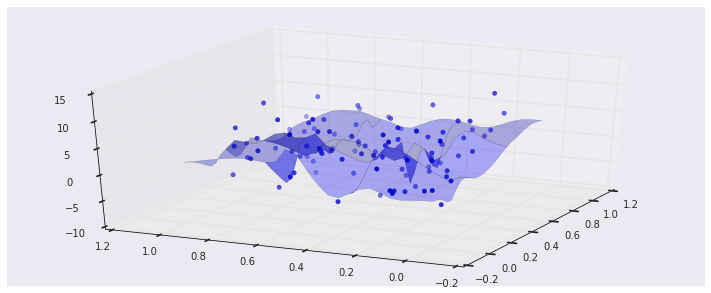

In [200]:
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(figsize=(45,10))

fig = plt.figure(figsize=(12.5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               #, cmap=cm.coolwarm
               );

# ax.plot_surface(u,v,z1
#                 ,shade=True,
#                 rstride=8, cstride=8, alpha=0.3
#                #, cmap=cm.coolwarm
#                );
#ax.plot_wireframe(u,v,z,alpha=.4)
ax.scatter(observed[0],observed[1],observed_y)



ax.view_init(elev=30.,azim=205)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


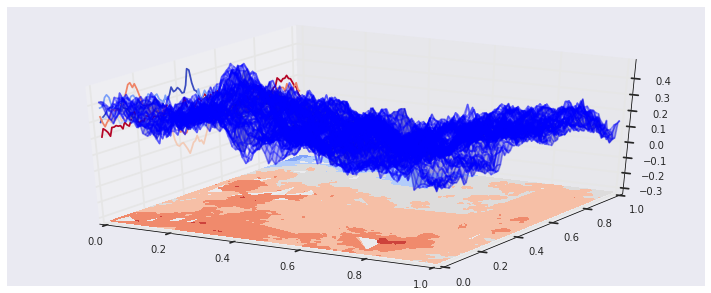

In [40]:
#figsize(12.5,5)

value='c'

c=1
kernel = {
    'a': lambda x,y: c*x.T.dot(y),
    'b': lambda x,y: np.exp(-100*(x-y).T.dot(x-y)),
    'c': lambda x,y: np.exp(-1*np.sqrt((x-y).T.dot(x-y)))
    #'d': lambda x,y: np.min(x,y)
}[value]

n_points=100
points = np.linspace(0,1,n_points).T
[u,v] = np.meshgrid(points,points)
x = np.array([u.flatten(),v.flatten()])#arrays zu 1d machen
n = x.shape[1]

C = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        C[i,j]=kernel(x[:,i],x[:,j])
        
num_ = 1
dist = stats.norm
fac = dist.rvs(0,1,(num_,1))#[::10]

a, s, b = np.linalg.svd(C, full_matrices=True)
tmp = a.dot(np.sqrt(s))*fac.T

z = tmp.reshape((n_points,n_points))

#plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12.5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               #, cmap=cm.coolwarm
               );
ax.plot_wireframe(u,v,z,alpha=.4)
cset = ax.contourf(u,v,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='x', offset=np.min(x), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='y', offset=np.min(y), cmap=cm.coolwarm)



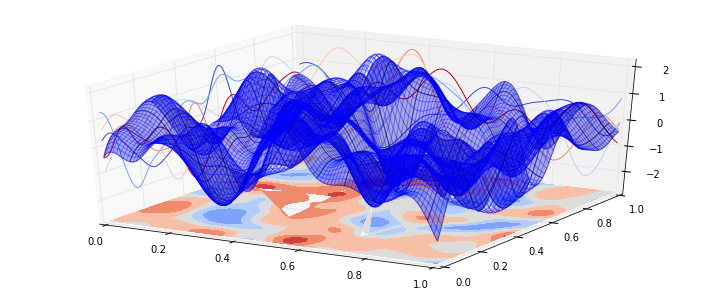

In [73]:

value='b'

c=1
kernel = {
    'a': lambda x,y: c*x.T.dot(y),
    'b': lambda x,y: np.exp(-100*(x-y).T.dot(x-y)),
    'c': lambda x,y: np.exp(-1*np.sqrt((x-y).T.dot(x-y)))
}[value]


points = np.linspace(0,1,n_points).T
[u,v] = np.meshgrid(points,points)
x = np.array([u.flatten(),v.flatten()])#arrays zu 1d machen
n = x.shape[1]

C = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        C[i,j]=kernel(x[:,i],x[:,j])
        
num_ = 1
dist = stats.norm
fac = dist.rvs(0,1,(num_,1))#[::10]

a, s, b = np.linalg.svd(C, full_matrices=True)
tmp = a.dot(np.sqrt(s))*fac.T

z = tmp.reshape((n_points,n_points))




In [ ]:
#plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               #, cmap=cm.coolwarm
               );
ax.plot_wireframe(u,v,z,alpha=.4)
cset = ax.contourf(u,v,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='x', offset=np.min(x), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='y', offset=np.min(y), cmap=cm.coolwarm)


#Inference


#from  http://mrmartin.net/?p=223

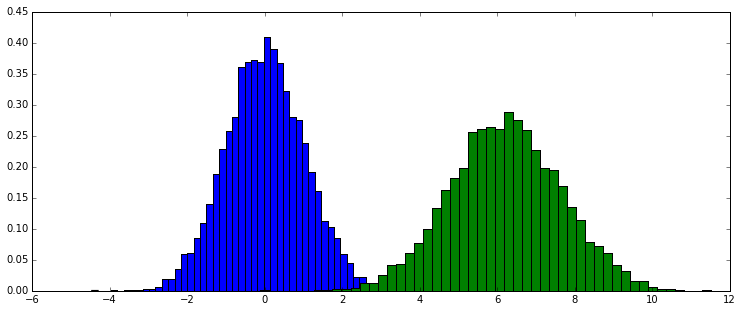

In [87]:
mu = 6.2
sigma_squared = 2

standard_normal_random_number = []
normal_random_number  = []
for i in range(10000):
    standard_normal_random_number += [np.random.randn()]
    normal_random_number += [np.sqrt(sigma_squared)*standard_normal_random_number[i] + mu]
    
    
plt.hist(standard_normal_random_number,bins=50,normed=True);
plt.hist(normal_random_number,bins=50,normed=True);

In [132]:
mu = np.atleast_2d([3,0]).T
sigma = np.array([[1.,-.9195],[.9195,1.]])
#V,D = np.linalg.eigh(sigma)
#A = V.dot(np.sqrt(D))
a, s, b = np.linalg.svd(sigma, full_matrices=True)
A = a.dot(np.sqrt(s))

fac = np.zeros((2,10000))
for i in range(10000):
    fac[:,i] = np.random.randn(2)
    nrv[:,i] = np.atleast_2d(A).dot(np.atleast_2d(fac[:,i]).T)

IndexError: too many indices for array

In [133]:
np.atleast_2d(A).dot(np.atleast_2d(fac[:,i]).T).shape

(1, 1)

#PLotting

In [23]:
tmp1 = np.array([1,2,3,4,5,6,7,8,9,10])
tmp2 = np.array([2,2,2,5,5,5,5,9,9,9])


In [24]:
points = np.linspace(-10,10,500).T


[x,y] = np.meshgrid(points,points)
z = 1*(np.exp(-((x-4)**2+(y-4)**2)**2/1000) 
       + np.exp(-((x+4)**2+(y+4)**2)**2/1000) 
       + 0.1*np.exp(-((x+4)**2+(y+4)**2)**2)
       +0.1*np.exp(-((x-4)**2+(y- 4)**2)**2))

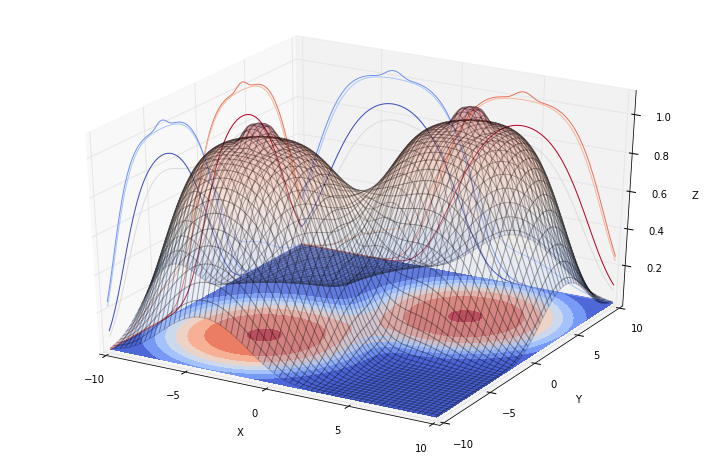

In [26]:
figsize(12.5,8)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.2
               , cmap=cm.coolwarm
               );
cset = ax.contourf(x,y,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(x,y,z, zdir='x', offset=np.min(x), cmap=cm.coolwarm)
cset = ax.contour(x,y,z, zdir='y', offset=np.max(y), cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


exp(-((x-4)^2+(y-4)^2)^2/1000) + exp(-((x+4)^2+(y+4)^2)^2/1000) + 0.1exp(-((x+4)^2+(y+4)^2)^2)+0.1exp(-((x­-4)^2+(y- 4)^2)^2)

#cool plotting

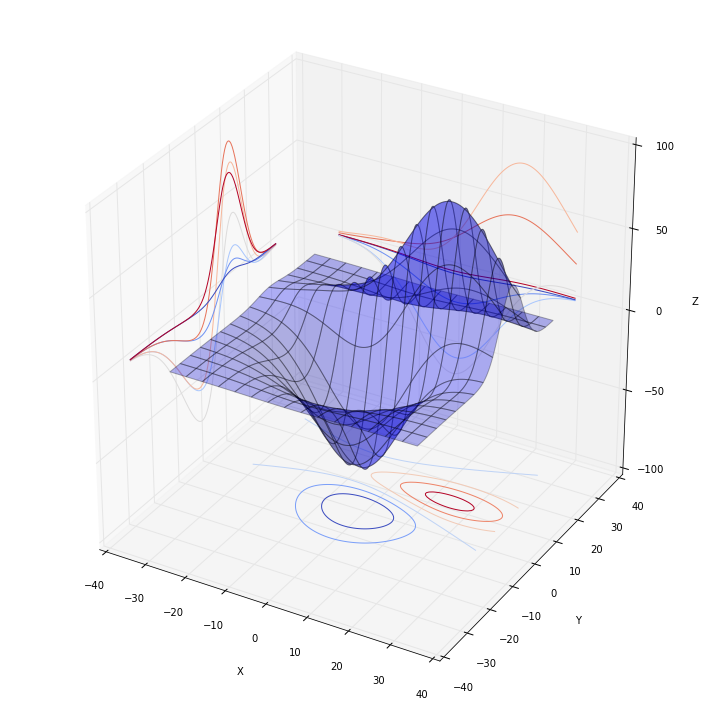

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


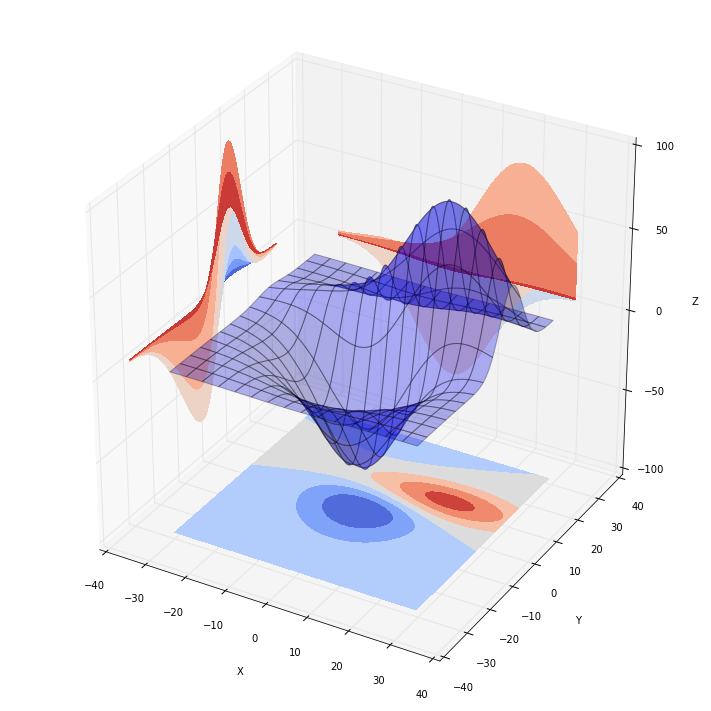

In [9]:
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()
